In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [33]:
from sklearn import datasets 
data = datasets.load_breast_cancer()
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

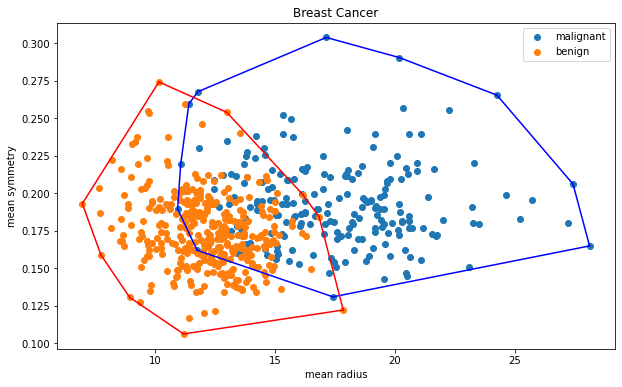

In [36]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Breast Cancer')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:  
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

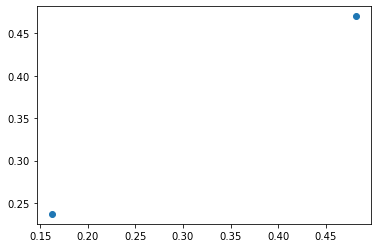

In [37]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-Dv
hull = ConvexHull(points)
points = points.tolist()
plt.plot(points[0:len(points)][0], points[0:len(points)][1], 'o')

#for simplex in hull.simplices:
 #   plt.plot(points[simplex, 0], points[simplex, 1], 'ro--')

In [38]:
from sklearn import datasets
from myConvexHull import myConvexHull 
data = datasets.load_iris()
data.data = data.data[:10]
print(data.data)

ch = myConvexHull(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


KeyError: 0

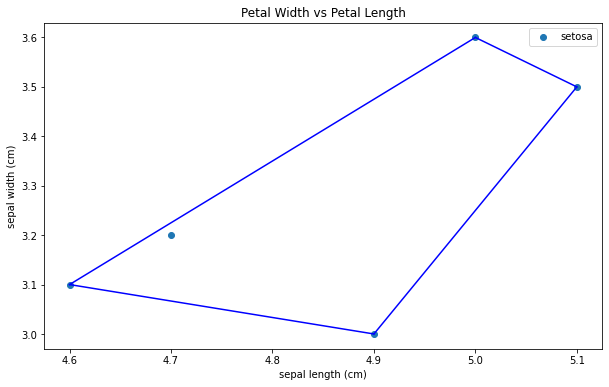

In [ ]:
from sklearn import datasets
#from myConvexHull import myConvexHull 
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd
data = datasets.load_iris()
data.data = data.data[:5]

df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(1):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:  
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()